In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("tmdb-movies.csv")

In [3]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
df.shape

(10866, 21)

In [5]:
df.keys()

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

display only columns that contain nulls 

In [8]:
missing = df.isnull().sum()[df.isnull().sum() > 0] 
missing

imdb_id                   10
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
genres                    23
production_companies    1030
dtype: int64

In [9]:
missing = missing.sort_values()
missing

overview                   4
imdb_id                   10
genres                    23
director                  44
cast                      76
production_companies    1030
keywords                1493
tagline                 2824
homepage                7930
dtype: int64

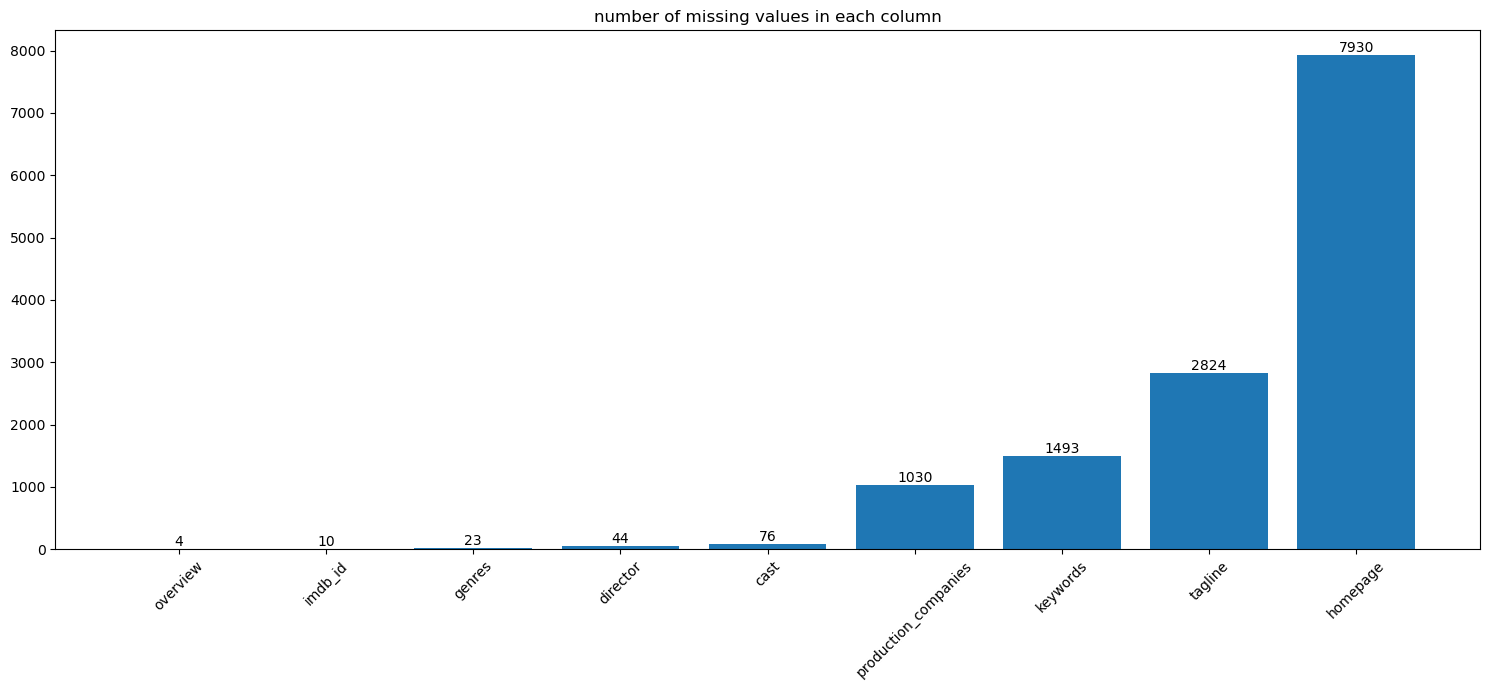

In [10]:
plt.figure(figsize=(15, 7))

plt.title('number of missing values in each column')
#plt.bar(missing.keys(),missing.values)
plt.bar_label(plt.bar(missing.keys(),missing.values)) #dislays the actual value above each bar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
df[df.duplicated()== True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

In [13]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


more than 50% of the movies have missing values of revenue and budget

In [14]:
str(df[df["revenue"]== 0].shape[0] / df.shape[0] * 100) +'%'

'55.37045559134837%'

In [15]:
str(df[df["budget"]== 0].shape[0] / df.shape[0] * 100) +'%'

'52.425218591808566%'

In [16]:
df[df["runtime"]== 0].shape[0]

31

# Data cleaning

In [17]:
df["release_date"] = df["release_date"].str[0:-2] + df["release_year"].astype('str')


In [18]:
df["release_date"]

0          6/9/2015
1         5/13/2015
2         3/18/2015
3        12/15/2015
4          4/1/2015
            ...    
10861     6/15/1966
10862    12/21/1966
10863      1/1/1966
10864     11/2/1966
10865    11/15/1966
Name: release_date, Length: 10865, dtype: object

In [19]:
df['release_date'] = pd.to_datetime(df["release_date"],format='%m/%d/%Y')
df["release_date"]

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [21]:
str(df.loc[0]["release_year"])


'2015'

## Replace missing data of budget and revenue by the mean values of budget and revenue of all movies made that year

In [20]:
y_data = df.set_index('release_date')
y= y_data.resample('Y').mean()
budget_mean = y["budget"]
revenue_mean = y["revenue"]
print(budget_mean[str(df.loc[0]["release_year"])][0])
print(revenue_mean[str(df.loc[0]["release_year"])][0])

12077182.125596184
42547616.08585056


C:\Users\Madjid\AppData\Local\Temp\ipykernel_1160\2143436899.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y= y_data.resample('Y').mean()


In [21]:

df['budget'] = df.apply(lambda row: budget_mean[str(row["release_year"])][0] if row['budget'] <= 0 else row['budget'], axis=1)
df['revenue'] = df.apply(lambda row: revenue_mean[str(row["release_year"])][0] if row['revenue'] <= 0 else row['revenue'], axis=1)
df[['budget','revenue']].describe()



,budget,revenue
count,1.086500e+04,1.086500e+04
mean,2.188967e+07,6.143101e+07
std,2.847848e+07,1.114198e+08
min,1.000000e+00,2.000000e+00
25%,8.000000e+06,2.292190e+07
50%,1.500000e+07,4.027214e+07
75%,2.220590e+07,5.000000e+07
max,4.250000e+08,2.781506e+09


In [24]:
#df.director.fillna("other", inplace=True)

In [25]:
#df.director.value_counts()

# how many movies are made each year

In [22]:
movie_year = df['release_year'].value_counts().sort_index()

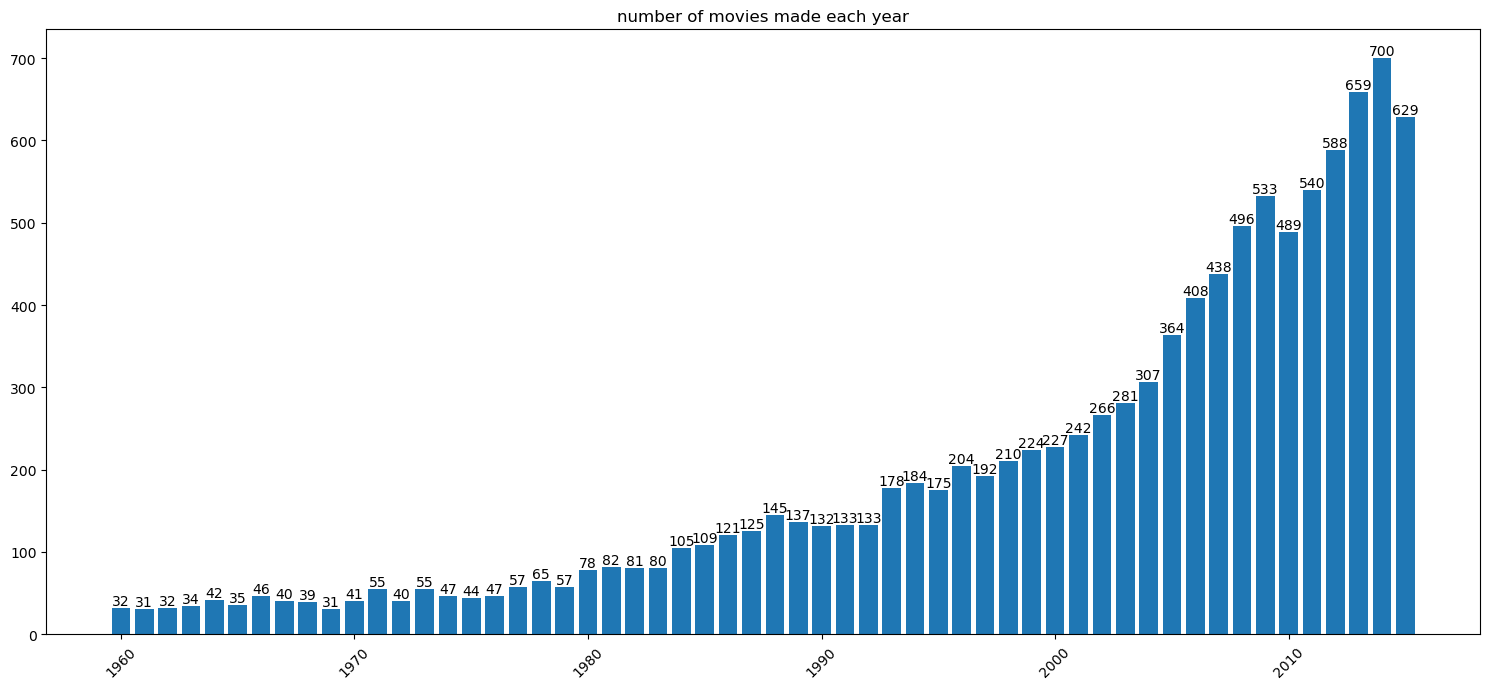

In [23]:
plt.figure(figsize=(15, 7))

plt.title('number of movies made each year')
#plt.bar(missing.keys(),missing.values)
plt.bar_label(plt.bar(movie_year.keys(),movie_year.values)) #dislays the actual value above each bar
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# movies with highes revenue

In [24]:
df.sort_values(by="revenue",ascending=False)[['original_title','revenue','budget', 'popularity', 'genres', 'release_year', 'director', 'production_companies']].head(10)

,original_title,revenue,budget,popularity,genres,release_year,director,production_companies
1386,Avatar,2.781506e+09,237000000.0,9.432768,Action|Adventure|Fantasy|Science Fiction,2009,James Cameron,Ingenious Film Partners|Twentieth Century Fox ...
3,Star Wars: The Force Awakens,2.068178e+09,200000000.0,11.173104,Action|Adventure|Science Fiction|Fantasy,2015,J.J. Abrams,Lucasfilm|Truenorth Productions|Bad Robot
5231,Titanic,1.845034e+09,200000000.0,4.355219,Drama|Romance|Thriller,1997,James Cameron,Paramount Pictures|Twentieth Century Fox Film ...
4361,The Avengers,1.519558e+09,220000000.0,7.637767,Science Fiction|Action|Adventure,2012,Joss Whedon,Marvel Studios
0,Jurassic World,1.513529e+09,150000000.0,32.985763,Action|Adventure|Science Fiction|Thriller,2015,Colin Trevorrow,Universal Studios|Amblin Entertainment|Legenda...
4,Furious 7,1.506249e+09,190000000.0,9.335014,Action|Crime|Thriller,2015,James Wan,Universal Pictures|Original Film|Media Rights ...
14,Avengers: Age of Ultron,1.405036e+09,280000000.0,5.944927,Action|Adventure|Science Fiction,2015,Joss Whedon,Marvel Studios|Prime Focus|Revolution Sun Studios
3374,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09,125000000.0,5.711315,Adventure|Family|Fantasy,2011,David Yates,Warner Bros.|Heyday Films|Moving Picture Compa...
5422,Frozen,1.274219e+09,150000000.0,6.112766,Animation|Adventure|Family,2013,Chris Buck|Jennifer Lee,Walt Disney Pictures|Walt Disney Animation Stu...
5425,Iron Man 3,1.215440e+09,200000000.0,4.946136,Action|Adventure|Science Fiction,2013,Shane Black,Marvel Studios


# Which movies have the biggest budget?

In [25]:
df.sort_values(by="budget", ascending=False)[['original_title','revenue','budget', 'popularity', 'genres', 'release_year', 'director', 'production_companies']].head(10)

,original_title,revenue,budget,popularity,genres,release_year,director,production_companies
2244,The Warrior's Way,1.108757e+07,425000000.0,0.250540,Adventure|Fantasy|Action|Western|Thriller,2010,Sngmoo Lee,Boram Entertainment Inc.
3375,Pirates of the Caribbean: On Stranger Tides,1.021683e+09,380000000.0,4.955130,Adventure|Action|Fantasy,2011,Rob Marshall,Walt Disney Pictures|Jerry Bruckheimer Films|M...
7387,Pirates of the Caribbean: At World's End,9.610000e+08,300000000.0,4.965391,Adventure|Fantasy|Action,2007,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|S...
14,Avengers: Age of Ultron,1.405036e+09,280000000.0,5.944927,Action|Adventure|Science Fiction,2015,Joss Whedon,Marvel Studios|Prime Focus|Revolution Sun Studios
6570,Superman Returns,3.910812e+08,270000000.0,1.957331,Adventure|Fantasy|Action|Science Fiction,2006,Bryan Singer,DC Comics|Legendary Pictures|Warner Bros.|Bad ...
4411,John Carter,2.841391e+08,260000000.0,1.588457,Action|Adventure|Fantasy|Science Fiction,2012,Andrew Stanton,Walt Disney Pictures
1929,Tangled,5.917949e+08,260000000.0,2.865684,Animation|Family,2010,Nathan Greno|Byron Howard,Walt Disney Pictures|Walt Disney Animation Stu...
7394,Spider-Man 3,8.908716e+08,258000000.0,2.520912,Fantasy|Action|Adventure,2007,Sam Raimi,Columbia Pictures|Laura Ziskin Productions|Mar...
5508,The Lone Ranger,8.928991e+07,255000000.0,1.214510,Action|Adventure|Western,2013,Gore Verbinski,Walt Disney Pictures|Jerry Bruckheimer Films|I...
1923,Harry Potter and the Deathly Hallows: Part 1,9.543059e+08,250000000.0,4.840588,Adventure|Fantasy|Family,2010,David Yates,Warner Bros.|Heyday Films


# Who are the most successful directors? Who made the most movies?

## Who made the most movies?

In [26]:
df.director.value_counts().head(10)

Woody Allen          45
Clint Eastwood       34
Martin Scorsese      29
Steven Spielberg     29
Ridley Scott         23
Steven Soderbergh    22
Ron Howard           22
Joel Schumacher      21
Brian De Palma       20
Tim Burton           19
Name: director, dtype: int64

## the most successful directors are the ones who made the biggest net

In [27]:
group = df.groupby('director')

In [28]:
g = group.get_group("Ron Howard")
g[["budget","revenue"]].sum()

budget     1.251665e+09
revenue    3.666779e+09
dtype: float64

In [30]:
directors = []
nets = []
for director,director_df in group:
    net = director_df.revenue.sum() - director_df.budget.sum()
    directors.append(director)
    nets.append(net)
ddf = pd.DataFrame({
    "director": directors,
    "net": nets
})    
ddf.sort_values(by='net', ascending=False).head(10)  

,director,net
4601,Steven Spielberg,7.463673e+09
3800,Peter Jackson,5.261866e+09
1997,James Cameron,5.126159e+09
3284,Michael Bay,3.557208e+09
1203,David Yates,3.404498e+09
763,Chris Columbus,3.256808e+09
845,Christopher Nolan,3.217078e+09
1679,George Lucas,2.955997e+09
4140,Robert Zemeckis,2.899924e+09
1942,J.J. Abrams,2.839170e+09


# What is the ideal movie length?

In [31]:
popular_movies= df.sort_values(by="popularity", ascending=False)[["original_title","popularity","revenue","budget","runtime"]].head(10).reset_index()
popular_movies

,index,original_title,popularity,revenue,budget,runtime
0,0,Jurassic World,32.985763,1.513529e+09,150000000.0,124
1,1,Mad Max: Fury Road,28.419936,3.784364e+08,150000000.0,120
2,629,Interstellar,24.949134,6.217525e+08,165000000.0,169
3,630,Guardians of the Galaxy,14.311205,7.733124e+08,170000000.0,121
4,2,Insurgent,13.112507,2.952382e+08,110000000.0,119
5,631,Captain America: The Winter Soldier,12.971027,7.147666e+08,170000000.0,136
6,1329,Star Wars,12.037933,7.753980e+08,11000000.0,121
7,632,John Wick,11.422751,7.873990e+07,20000000.0,101
8,3,Star Wars: The Force Awakens,11.173104,2.068178e+09,200000000.0,136
9,633,The Hunger Games: Mockingjay - Part 1,10.739009,7.521002e+08,125000000.0,123


In [32]:
mean_runtime = int(popular_movies["runtime"].mean())
print('the ideal movie length is '+str(mean_runtime)+' minutes')

the ideal movie length is 127 minutes


In [33]:
#second method
df.loc[df['popularity'].nlargest(10).keys()]["runtime"].mean()

127.0

# What are the most common genres

In [34]:
df["genres"].fillna("other", inplace=True)


In [35]:
df["genres"]

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

In [36]:
arr = df["genres"].values

In [37]:
genres = []
for i,comp in enumerate(arr):
    if (i<10):
        s = comp.split('|')
        for g in s:
            genres.append(g)
print(genres)      


['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Action', 'Adventure', 'Science Fiction', 'Thriller', 'Adventure', 'Science Fiction', 'Thriller', 'Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Action', 'Crime', 'Thriller', 'Western', 'Drama', 'Adventure', 'Thriller', 'Science Fiction', 'Action', 'Thriller', 'Adventure', 'Drama', 'Adventure', 'Science Fiction', 'Family', 'Animation', 'Adventure', 'Comedy', 'Comedy', 'Animation', 'Family']


In [38]:
genres = []
for comp in arr:
    s = comp.split('|')
    for g in s:
        genres.append(g)

In [39]:
gg = pd.DataFrame(genres, columns=['genres'])
genre= gg['genres'].value_counts().keys()
counts = gg.value_counts().values
print(genre , counts)

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction', 'Fantasy', 'Mystery',
       'Animation', 'Documentary', 'Music', 'History', 'War', 'Foreign',
       'TV Movie', 'Western', 'other'],
      dtype='object') [4760 3793 2907 2384 1712 1637 1471 1354 1231 1229  916  810  699  520
  408  334  270  188  167  165   23]


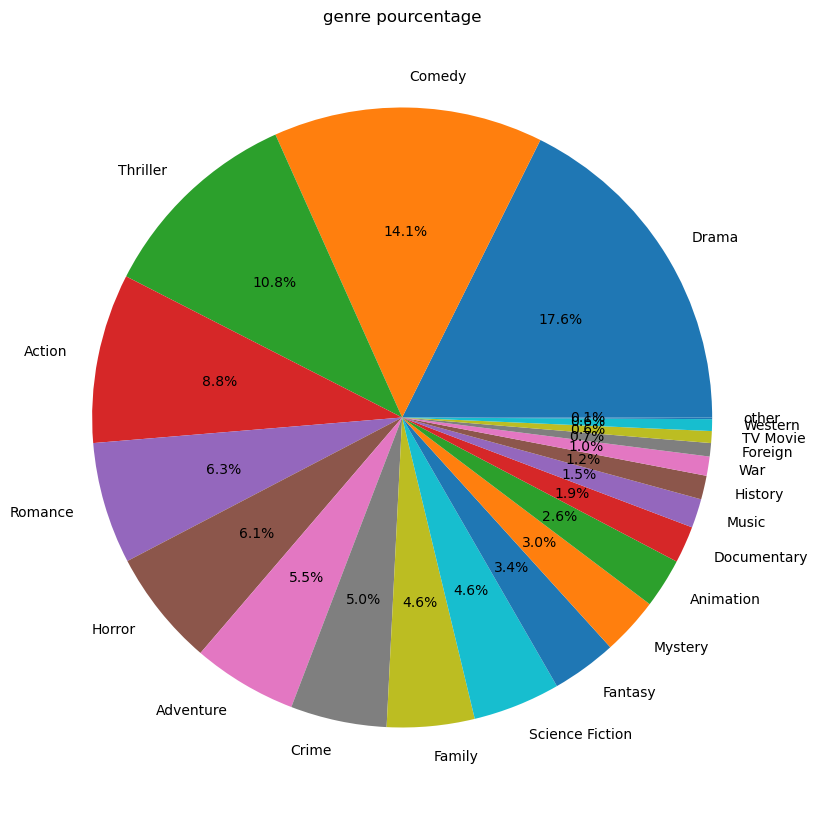

In [40]:
plt.figure(figsize=(10,16))
plt.pie(counts,labels=genre, autopct='%1.1f%%')
plt.title('genre pourcentage')
plt.show()

In [41]:
# import time

# # Method 1
# start_time = time.time()

# arr = df["genres"].values
# genres = []
# for comp in arr:
#     s = comp.split('|')
#     for g in s:
#         genres.append(g)
# gg = pd.DataFrame(genres, columns=['genres'])
# genre = gg['genres'].value_counts().keys()
# counts = gg.value_counts().values

# method1_time = time.time() - start_time
# print("Method 1 Execution Time:", method1_time)


Method 1 Execution Time: 0.016954898834228516


In [42]:
# start_time = time.time()

# compounds = df.genres.unique()
# genre_list = []


# for compound in compounds:
#     genres = compound.split('|')
#     for genre in genres:
#         if genre not in genre_list:
#             genre_list.append(genre)


# count = []
# for genre in genre_list:
#     count.append(df[df['genres'].str.contains(genre, case=False)].shape[0])


# sorted_lists = sorted(zip(count, genre_list), reverse=True)
# sorted_count, sorted_genre = zip(*sorted_lists)

# method2_time = time.time() - start_time
# print("Method 2 Execution Time:", method2_time)

Method 2 Execution Time: 0.1825394630432129
